In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
path="C:/Users/nicol/OneDrive/Documentos/VSCLocal/Data/TFM/"
data=pd.read_csv(path+"datos_procesados_11.csv")

In [63]:
"""df=data[['propertyCode','price','priceByArea', 'floor', 'size', 'rooms', 'bathrooms', 'distance', 'latitude', 'longitude',
                    'hasLift','hasParkingSpace','isParkingSpaceIncludedInPrice', 'parkingSpacePrice','priceByAreaByDistrict','priceByAreaByneighborhood', 
                    'roomSize', 'bathroomSize', 'bathroomRoom','liftFloorInteraction']]"""

"df=data[['propertyCode','price','priceByArea', 'floor', 'size', 'rooms', 'bathrooms', 'distance', 'latitude', 'longitude',\n                    'hasLift','hasParkingSpace','isParkingSpaceIncludedInPrice', 'parkingSpacePrice','priceByAreaByDistrict','priceByAreaByneighborhood', \n                    'roomSize', 'bathroomSize', 'bathroomRoom','liftFloorInteraction']]"

In [64]:
# Filtramos los pisos cuyo precio es inferior a 800,000 euros.
df = data[data['price'] <= 800000]
print('Cantidad de pisos cuyo precio es inferior a 800,000:',df.count()['price'])

Cantidad de pisos cuyo precio es inferior a 800,000: 10487


In [65]:
# Creación de nuevas características
df['roomSize'] = df['size'] / df['rooms']
df['bathroomSize'] = df['size'] / df['bathrooms']
df['bathroomRoom'] = df['bathrooms'] / df['rooms']
df['liftFloorInteraction'] = df['hasLift'] * df['floor']

C:\Users\nicol\AppData\Local\Temp\ipykernel_16540\3833064372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roomSize'] = df['size'] / df['rooms']
C:\Users\nicol\AppData\Local\Temp\ipykernel_16540\3833064372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bathroomSize'] = df['size'] / df['bathrooms']
C:\Users\nicol\AppData\Local\Temp\ipykernel_16540\3833064372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

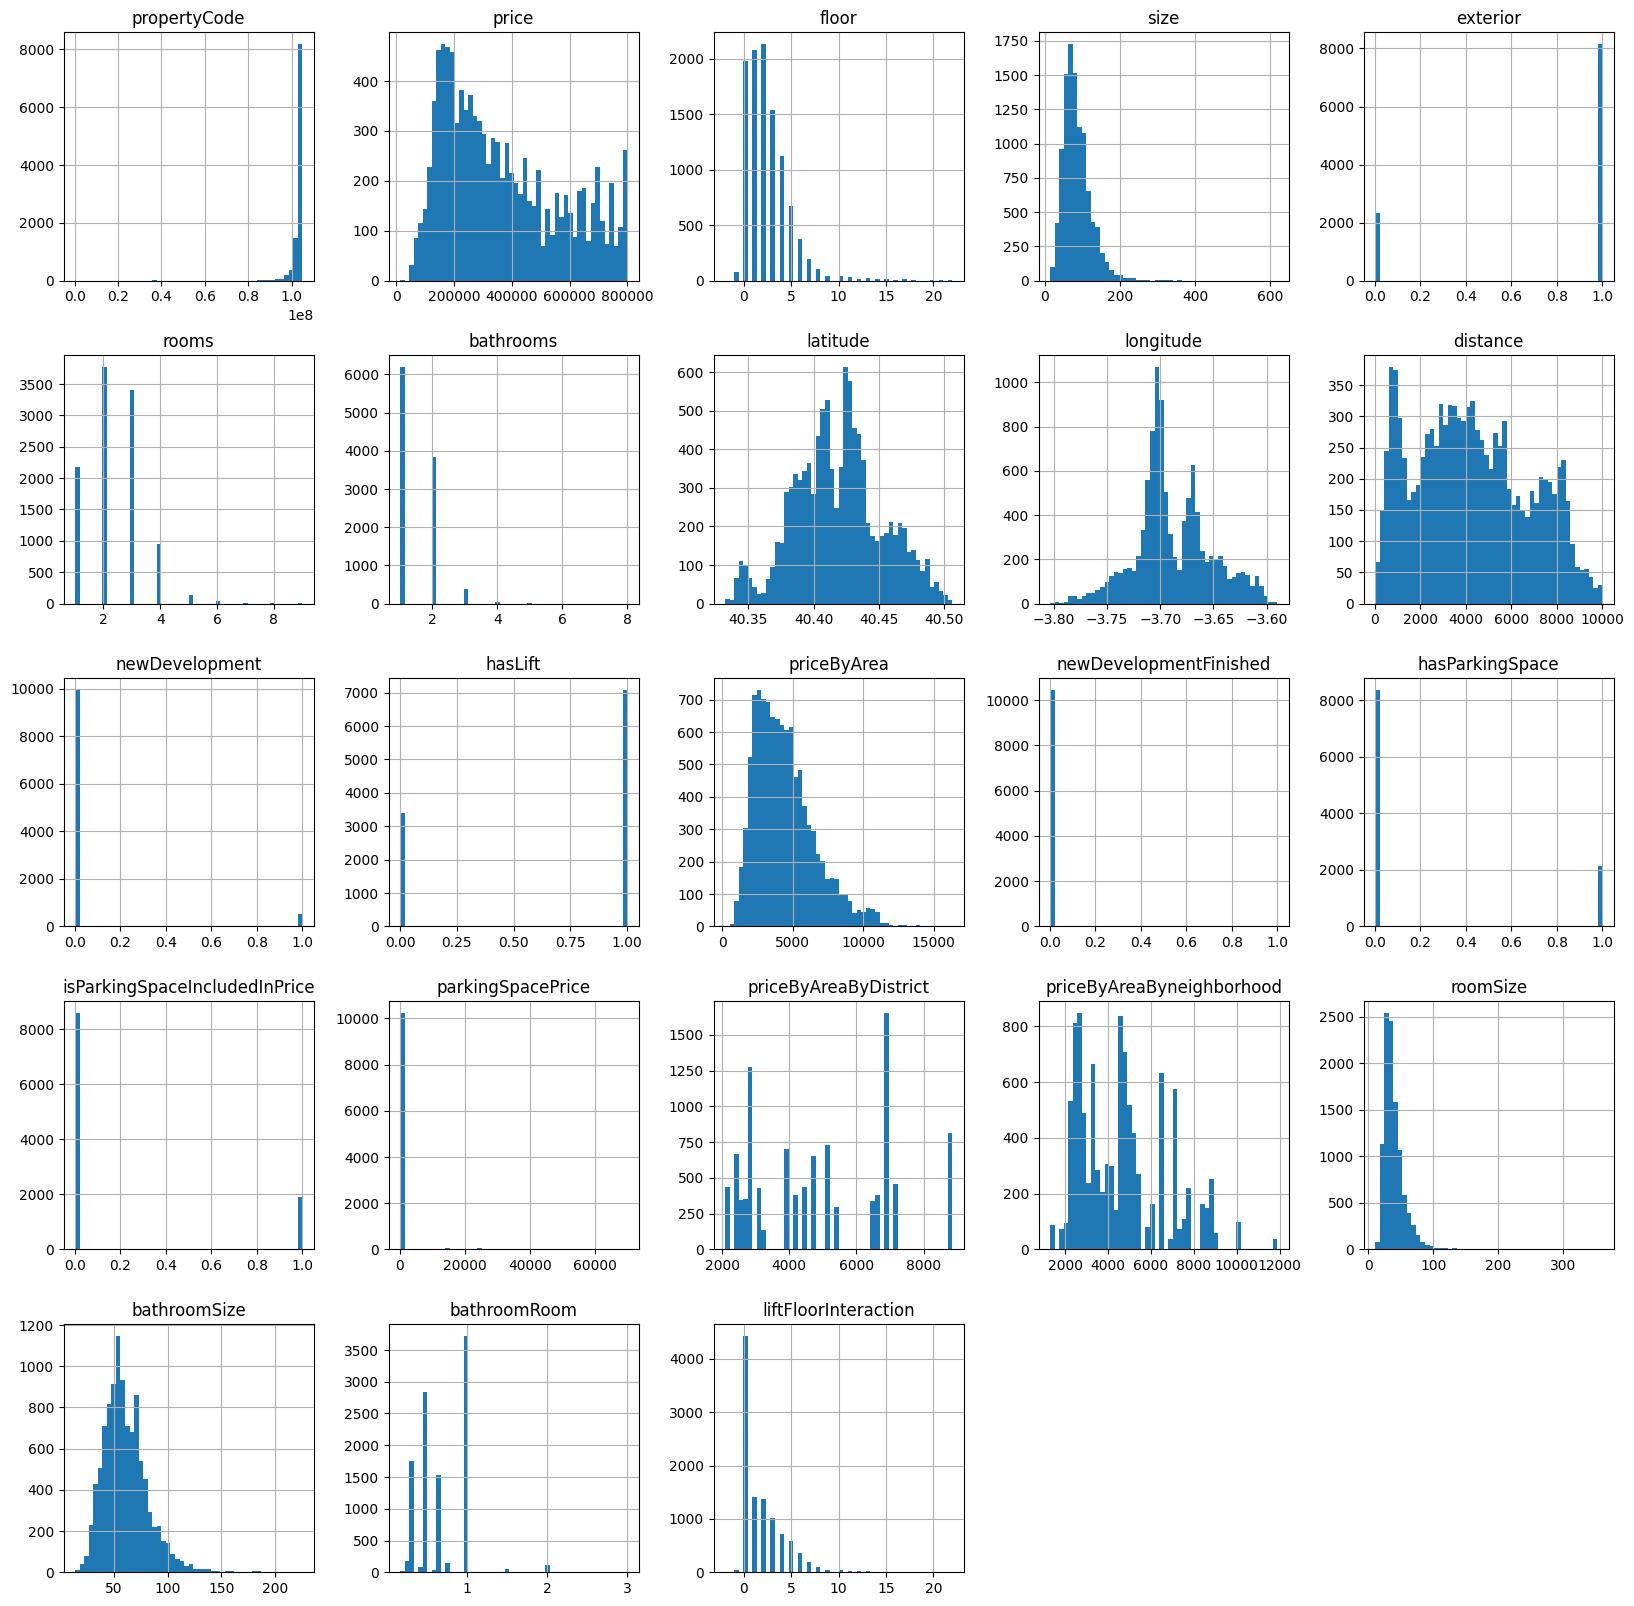

In [66]:
df.hist(bins=50, figsize=(20, 20))
plt.show()

In [67]:
corr_matrix = df[['price','priceByArea', 'floor', 'size', 'rooms', 'bathrooms', 'distance', 'latitude', 'longitude',
                    'hasLift','hasParkingSpace','isParkingSpaceIncludedInPrice', 'parkingSpacePrice','priceByAreaByDistrict','priceByAreaByneighborhood', 
                    'roomSize', 'bathroomSize', 'bathroomRoom','liftFloorInteraction']].corr()
corr_matrix["price"].sort_values(ascending=False)

price                            1.000000
priceByArea                      0.642029
priceByAreaByneighborhood        0.638572
bathrooms                        0.589243
priceByAreaByDistrict            0.586987
size                             0.576841
hasLift                          0.436971
latitude                         0.385826
liftFloorInteraction             0.326283
roomSize                         0.290571
rooms                            0.256068
hasParkingSpace                  0.237606
isParkingSpaceIncludedInPrice    0.228598
bathroomRoom                     0.218793
floor                            0.195538
bathroomSize                     0.081461
parkingSpacePrice                0.076028
longitude                       -0.036722
distance                        -0.302925
Name: price, dtype: float64

In [68]:

# Verificar el DataFrame resultante
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10487 entries, 1 to 14465
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   propertyCode                   10487 non-null  int64  
 1   price                          10487 non-null  float64
 2   floor                          10487 non-null  int64  
 3   propertyType                   10487 non-null  object 
 4   size                           10487 non-null  float64
 5   exterior                       10487 non-null  int64  
 6   rooms                          10487 non-null  int64  
 7   bathrooms                      10487 non-null  int64  
 8   district                       10487 non-null  object 
 9   neighborhood                   10487 non-null  object 
 10  latitude                       10487 non-null  float64
 11  longitude                      10487 non-null  float64
 12  distance                       10487 non-null  int6

In [69]:
variables_x=['floor', 'propertyType', 'size', 'exterior', 'rooms',
       'bathrooms', 'district', 'neighborhood', 'latitude', 'longitude',
       'distance', 'status','hasLift', 'priceByArea','hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 'priceByAreaByDistrict','priceByAreaByneighborhood',
       'roomSize', 'bathroomSize', 'bathroomRoom','liftFloorInteraction']
variables_numericas=['priceByArea', 'floor', 'size', 'rooms', 'bathrooms', 'distance', 'latitude', 'longitude',
                    'hasLift','hasParkingSpace','isParkingSpaceIncludedInPrice', 'parkingSpacePrice','priceByAreaByDistrict','priceByAreaByneighborhood', 
                    'roomSize', 'bathroomSize', 'bathroomRoom','liftFloorInteraction']
variables_categoricas=['propertyType', 'status','district','neighborhood']

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Selecciona las características (X) y la variable objetivo (Y)
X = df[['floor', 'propertyType', 'size', 'exterior', 'rooms',
       'bathrooms', 'district', 'neighborhood', 'latitude', 'longitude',
       'distance', 'status','hasLift', 'priceByArea','hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 'priceByAreaByDistrict','priceByAreaByneighborhood',
       'roomSize', 'bathroomSize', 'bathroomRoom','liftFloorInteraction']]
y = df['price']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformaciones para las variables categóricas
categorical_features = ['propertyType', 'status','district','neighborhood']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Define transformaciones para las variables numéricas
numeric_features = ['priceByArea', 'floor', 'size', 'rooms', 'bathrooms', 'distance', 'latitude', 'longitude',
                    'hasLift','hasParkingSpace','isParkingSpaceIncludedInPrice', 'parkingSpacePrice','priceByAreaByDistrict','priceByAreaByneighborhood', 
                    'roomSize', 'bathroomSize', 'bathroomRoom','liftFloorInteraction']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define el preprocesamiento de las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combina preprocesamiento y modelo en un pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Entrena el modelo
model.fit(X_train, y_train)

# Evalúa el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
root_mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root_Mean Squared Error:", root_mse)

Mean Squared Error: 3251061460.5854106
Root_Mean Squared Error: 57018.08012012865


In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Selecciona las características (X) y la variable objetivo (Y)
X = df[['floor', 'propertyType', 'size', 'exterior', 'rooms',
       'bathrooms', 'district', 'neighborhood', 'latitude', 'longitude',
       'distance', 'status','hasLift', 'priceByArea','hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 'priceByAreaByDistrict','priceByAreaByneighborhood',
       'roomSize', 'bathroomSize', 'bathroomRoom','liftFloorInteraction']]
y = df['price']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformaciones para las variables categóricas
categorical_features = ['propertyType', 'status','district','neighborhood']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Define transformaciones para las variables numéricas
numeric_features = ['priceByArea', 'floor', 'size', 'rooms', 'bathrooms', 'distance', 'latitude', 'longitude',
                    'hasLift','hasParkingSpace','isParkingSpaceIncludedInPrice', 'parkingSpacePrice','priceByAreaByDistrict','priceByAreaByneighborhood', 
                    'roomSize', 'bathroomSize', 'bathroomRoom','liftFloorInteraction']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define el preprocesamiento de las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combina preprocesamiento y modelo en un pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor())])

# Entrena el modelo
model.fit(X_train, y_train)

# Evalúa el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
root_mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", root_mse)


Mean Squared Error: 312020548.74442947
Root Mean Squared Error: 17664.103394863534


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from category_encoders import TargetEncoder
from scipy.stats import randint, uniform

# Selecciona las características (X) y la variable objetivo (Y)
X = df[['floor', 'propertyType', 'size', 'exterior', 'rooms',
       'bathrooms', 'district', 'neighborhood', 'latitude', 'longitude',
       'distance', 'status','hasLift', 'priceByArea','hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 'priceByAreaByDistrict','priceByAreaByneighborhood',
       'roomSize', 'bathroomSize', 'bathroomRoom','liftFloorInteraction']]
y = df['price']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformaciones para las variables categóricas y numéricas
categorical_features = ['propertyType', 'status','district','neighborhood']
categorical_transformer = TargetEncoder()

numeric_features = ['priceByArea', 'floor', 'size', 'rooms', 'bathrooms', 'distance', 'latitude', 'longitude',
                    'hasLift','hasParkingSpace','isParkingSpaceIncludedInPrice', 'parkingSpacePrice','priceByAreaByDistrict','priceByAreaByneighborhood', 
                    'roomSize', 'bathroomSize', 'bathroomRoom','liftFloorInteraction']
numeric_transformer = StandardScaler()

# Define el preprocesamiento de las características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combina preprocesamiento y modelo en un pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor())])

# Define la distribución de hiperparámetros para la búsqueda aleatoria
param_dist = {
    'regressor__n_estimators': randint(600, 800),
    'regressor__learning_rate': uniform(0.05, 0.15),
    'regressor__max_depth': randint(3, 6)
}

# Aplica la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

# Obtiene el mejor modelo
best_model = random_search.best_estimator_

# Evalúa el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 83080110.67973378
Root Mean Squared Error: 9114.82916349691
Mean Absolute Error: 5545.922451985418


In [73]:
print(f"Total de datos filtrados menores a 800,000: {df['price'].count()}")
print(f"rmse // mean: {rmse/df['price'].mean()}")

Total de datos filtrados menores a 800,000: 10487
rmse // mean: 0.024998737901596395


In [74]:
# Obtiene los hiperparámetros del modelo GradientBoostingRegressor
params_regressor = best_model.named_steps['regressor'].get_params()
print("Hiperparámetros del modelo GradientBoostingRegressor:")
print(params_regressor)

Hiperparámetros del modelo GradientBoostingRegressor:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.08434683149534161, 'loss': 'squared_error', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 719, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


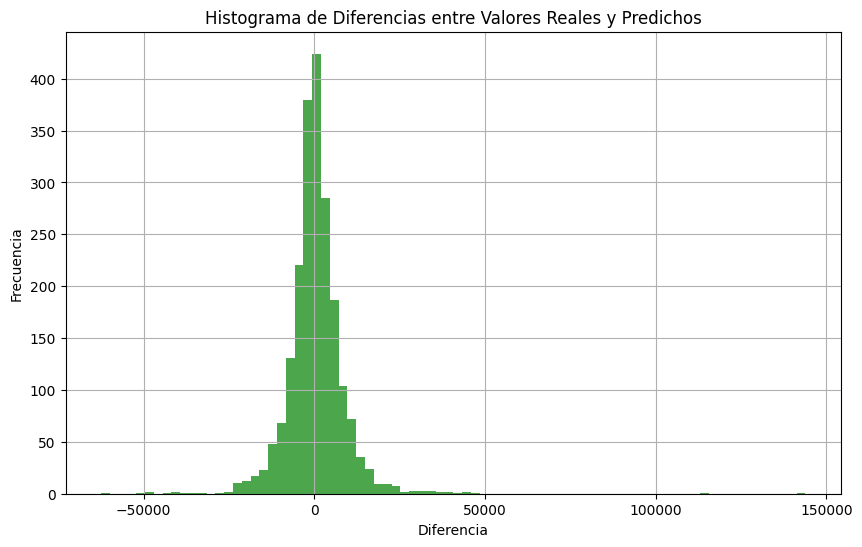

In [75]:
import matplotlib.pyplot as plt

# Calcular las diferencias entre los valores reales y predichos
differences = y_test - y_pred

# Graficar el histograma de las diferencias
plt.figure(figsize=(10, 6))
plt.hist(differences, bins=80, color='green', alpha=0.7)
plt.title('Histograma de Diferencias entre Valores Reales y Predichos')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Media de las diferencias: 376.86411906770314
Mediana de las diferencias: 135.4567142791493
Desviación estándar de las diferencias: 9107.034869566114


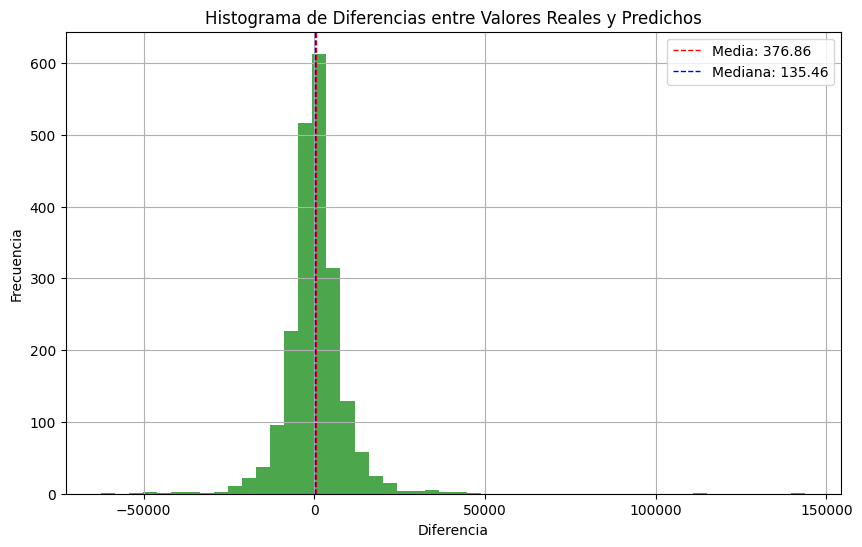

Número de diferencias extremas: 312
Valores extremos detectados:
12155     14911.573230
2300      22637.037556
6555     -15679.177067
12852    -12748.362690
12788     31956.422949
             ...      
1732      11987.772132
2039      43567.646680
2604      19349.360356
5602     143829.059211
5088     -17265.953920
Name: price, Length: 312, dtype: float64


In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular las diferencias entre los valores reales y predichos
differences = y_test - y_pred

# Calcular métricas estadísticas
mean_diff = np.mean(differences)
median_diff = np.median(differences)
std_diff = np.std(differences)

# Imprimir las métricas estadísticas
print(f'Media de las diferencias: {mean_diff}')
print(f'Mediana de las diferencias: {median_diff}')
print(f'Desviación estándar de las diferencias: {std_diff}')

# Graficar el histograma de las diferencias
plt.figure(figsize=(10, 6))
plt.hist(differences, bins=50, color='green', alpha=0.7)  # Ajustar el número de bins según sea necesario
plt.title('Histograma de Diferencias entre Valores Reales y Predichos')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.grid(True)

# Agregar líneas de las métricas estadísticas en el histograma
plt.axvline(mean_diff, color='red', linestyle='dashed', linewidth=1, label=f'Media: {mean_diff:.2f}')
plt.axvline(median_diff, color='blue', linestyle='dashed', linewidth=1, label=f'Mediana: {median_diff:.2f}')
plt.legend()

# Mostrar la gráfica
plt.show()

# Verificar datos extremos
extreme_diff = differences[(differences < -10000) | (differences > 10000)]
print(f'Número de diferencias extremas: {len(extreme_diff)}')
if len(extreme_diff) > 0:
    print('Valores extremos detectados:')
    print(extreme_diff)
else:
    print('No se detectaron valores extremos significativos.')


In [77]:
import pandas as pd
import numpy as np

# Ejemplo de DataFrame (reemplaza esto con tus datos reales)
df_outlier = pd.DataFrame({'y_test': y_test,'y_pred': y_pred})

# Calcular las diferencias entre los valores reales y predichos
df_outlier['difference'] = df_outlier['y_test'] - df_outlier['y_pred']

# Identificar valores extremos usando el método del IQR
Q1 = df_outlier['difference'].quantile(0.25)
Q3 = df_outlier['difference'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los valores extremos
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

extremes_iqr = df_outlier[(df_outlier['difference'] < lower_bound_iqr) | (df_outlier['difference'] > upper_bound_iqr)]

print(f'Valores extremos identificados por IQR: {len(extremes_iqr)}')
print(extremes_iqr)

# Identificar valores extremos usando el método de la desviación estándar
mean_diff = df_outlier['difference'].mean()
std_diff = df_outlier['difference'].std()

# Definir límites para los valores extremos (usualmente 3 desviaciones estándar)
lower_bound_std = mean_diff - 3 * std_diff
upper_bound_std = mean_diff + 3 * std_diff

extremes_std = df_outlier[(df_outlier['difference'] < lower_bound_std) | (df_outlier['difference'] > upper_bound_std)]

print(f'Valores extremos identificados por Desviación Estándar: {len(extremes_std)}')
print(extremes_std)


Valores extremos identificados por IQR: 142
         y_test         y_pred     difference
12155  450000.0  435088.426770   14911.573230
2300   800000.0  777362.962444   22637.037556
6555   572000.0  587679.177067  -15679.177067
12788  785000.0  753043.577051   31956.422949
10899  584000.0  607677.804787  -23677.804787
...         ...            ...            ...
2810   420000.0  482499.891604  -62499.891604
2039   520000.0  476432.353320   43567.646680
2604   790000.0  770650.639644   19349.360356
5602   750000.0  606170.940789  143829.059211
5088   460500.0  477765.953920  -17265.953920

[142 rows x 3 columns]
Valores extremos identificados por Desviación Estándar: 30
         y_test         y_pred     difference
12788  785000.0  753043.577051   31956.422949
6777   368000.0  405218.451858  -37218.451858
10998  450000.0  410677.657621   39322.342379
13652  770000.0  729417.859784   40582.140216
13063  800000.0  769604.466380   30395.533620
447    375000.0  425491.757276  -50491.757276

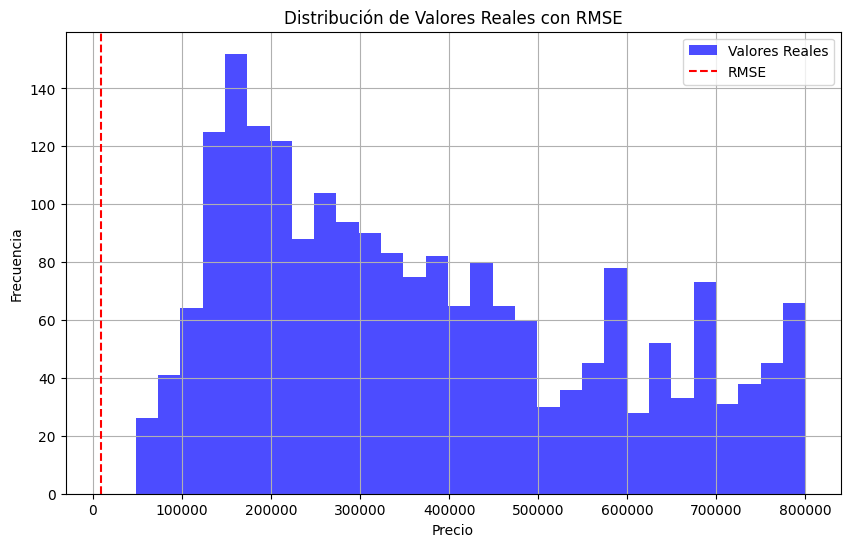

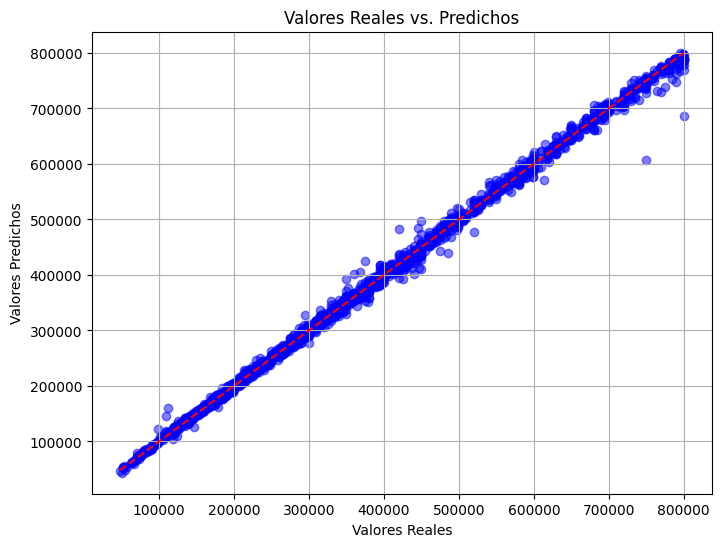

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que y_test contiene los valores reales y y_pred contiene los valores predichos
# También asumiendo que RMSE ya está calculado y almacenado en una variable llamada 'rmse'

# Comparar el RMSE con la distribución de la variable Y ('price')
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, color='blue', alpha=0.7, label='Valores Reales')
plt.axvline(x=rmse, color='red', linestyle='--', label='RMSE')
plt.title('Distribución de Valores Reales con RMSE')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la relación entre valores reales y predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Valores Reales vs. Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.grid(True)
plt.show()




In [79]:
import pandas as pd

# Supongamos que tienes tu DataFrame llamado df

# Definimos los límites de los tramos
max_price = int(df['price'].max())
bins = range(0, max_price + 50000, 50000)

# Etiquetamos los tramos
labels = [f'{i}-{i+49999}' for i in bins[:-1]]

# Creamos una nueva columna en el DataFrame que contendrá los tramos
df['price_bucket'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Mostramos los primeros registros del DataFrame con la nueva columna de bucketing
print(df[['price', 'price_bucket']].head())


      price   price_bucket
1   91000.0    50000-99999
2  279000.0  250000-299999
3  350000.0  350000-399999
4   70700.0    50000-99999
5  249000.0  200000-249999


C:\Users\nicol\AppData\Local\Temp\ipykernel_16540\1256121978.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_bucket'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)


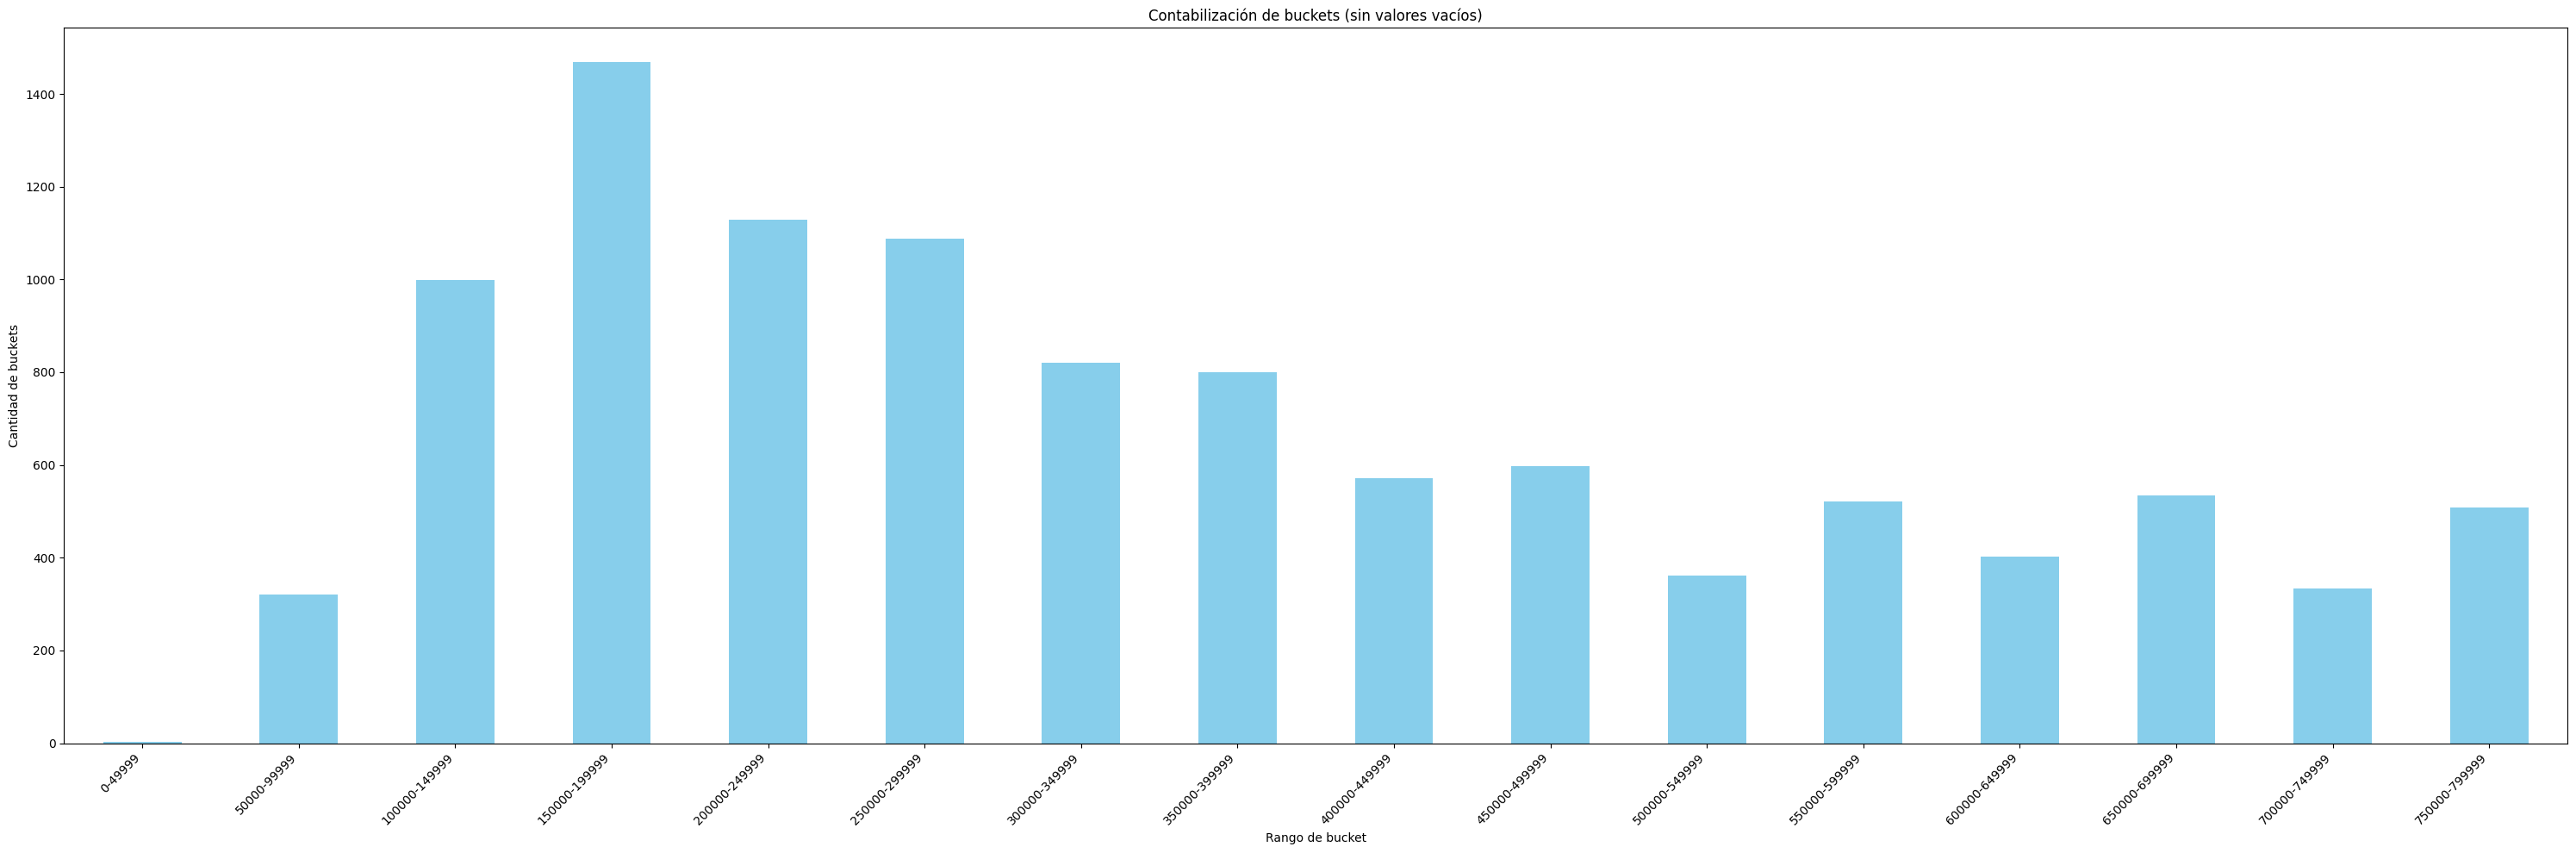

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame df con la columna 'price_bucket' creada

# Agrupamos por 'price_bucket' y contamos las observaciones en cada grupo
grouped_data = df.groupby('price_bucket', observed=False)['price'].count()
# Filtramos los buckets que tienen valores no nulos
grouped_data = grouped_data[grouped_data != 0]

# Creamos el gráfico de barras
plt.figure(figsize=(30, 10))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Contabilización de buckets (sin valores vacíos)')
plt.xlabel('Rango de bucket')
plt.ylabel('Cantidad de buckets')
plt.xticks(rotation=45, ha='right')  # Rotamos las etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

In [81]:
display(grouped_data)

price_bucket
0-49999             3
50000-99999       321
100000-149999     998
150000-199999    1469
200000-249999    1129
250000-299999    1087
300000-349999     820
350000-399999     800
400000-449999     572
450000-499999     597
500000-549999     361
550000-599999     522
600000-649999     402
650000-699999     535
700000-749999     334
750000-799999     509
Name: price, dtype: int64

In [82]:
# Evaluar el modelo en el conjunto de entrenamiento
y_pred_train = best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)

# Calcular métricas de evaluación en el conjunto de entrenamiento
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print("Training Set Metrics:")
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("Mean Absolute Error:", mae_train)

# Comparar métricas de entrenamiento y prueba
print("\nComparison with Test Set:")
print("Training MSE vs Test MSE:", mse_train - mse)
print("Training RMSE vs Test RMSE:", rmse_train - rmse)
print("Training MAE vs Test MAE:", mae_train - mae)


Training Set Metrics:
Mean Squared Error: 21155221.906276707
Root Mean Squared Error: 4599.480612664511
Mean Absolute Error: 3349.3532536601724

Comparison with Test Set:
Training MSE vs Test MSE: -61924888.77345708
Training RMSE vs Test RMSE: -4515.348550832399
Training MAE vs Test MAE: -2196.5691983252455


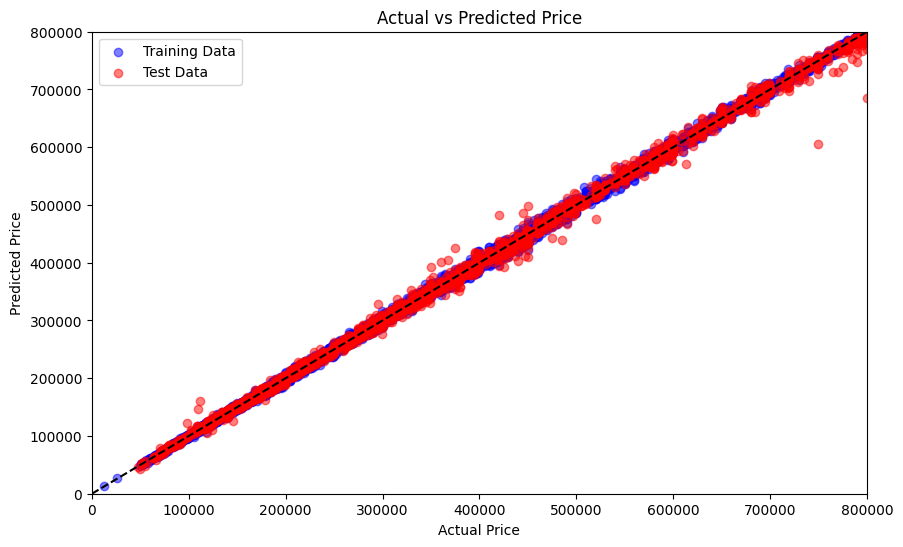

In [83]:
import matplotlib.pyplot as plt

# Predicciones del conjunto de entrenamiento
y_train_pred = best_model.predict(X_train)

# Predicciones del conjunto de prueba
y_test_pred = best_model.predict(X_test)

# Graficar las predicciones del conjunto de entrenamiento y conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.5)
plt.scatter(y_test, y_test_pred, label='Test Data', color='red', alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend(loc='upper left')
plt.plot([0, 800000], [0, 800000], color='black', linestyle='--') # Línea de referencia de la igualdad
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.show()
